# Compare different measurements average

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from lifa.licel import LicelLidarMeasurement

## Extract data from files

In [2]:
# Measurements directories to compare
directories = ['./sample_data/measurement_1',
          './sample_data/measurement_2',
          './sample_data/measurement_3',
          ]

# Licel Channels of interest
licel_channels_names = ['00355.o_an', '00395.s_an', '00353.o_an', '00371.o_an', '00395.p_an', '00460.o_an', '00532.o_an', '00530.o_an']

# Licel file wildcard (usually files starts with a, so a*.* is a good wildcard)
file_wildcard = 'a*.*'

# Get files list in each directory
measurement_files = {}
for sub_dir in directories:
    measurement_files[sub_dir] = glob.glob(os.path.join(sub_dir,file_wildcard))

# Read files
measurements = {}
for name, files in measurement_files.items():
    measurements[name] = LicelLidarMeasurement(files)

# Subset by channels
measurements_full = {}
for name, data in measurements.items():
    measurements_full[name] = data.subset_by_channels(licel_channels_names)

# Subset by bins
bin_min = 50
bin_max = 300
measurements_subset = {}
for name, data in measurements_full.items():
    measurements_subset[name] = measurements_full[name].subset_by_bins(bin_min,bin_max)

# Average measurements on a channel 
measurements_average = {}
for name, data in measurements_subset.items():
    signal = []
    for channel_name, channel in measurements_subset[name].channels.items():
        signal.append([channel.z, channel.average_profile()])
        distance = channel.z
    signal = np.array(signal)
    measurements_average[name] = signal

## Plot averages

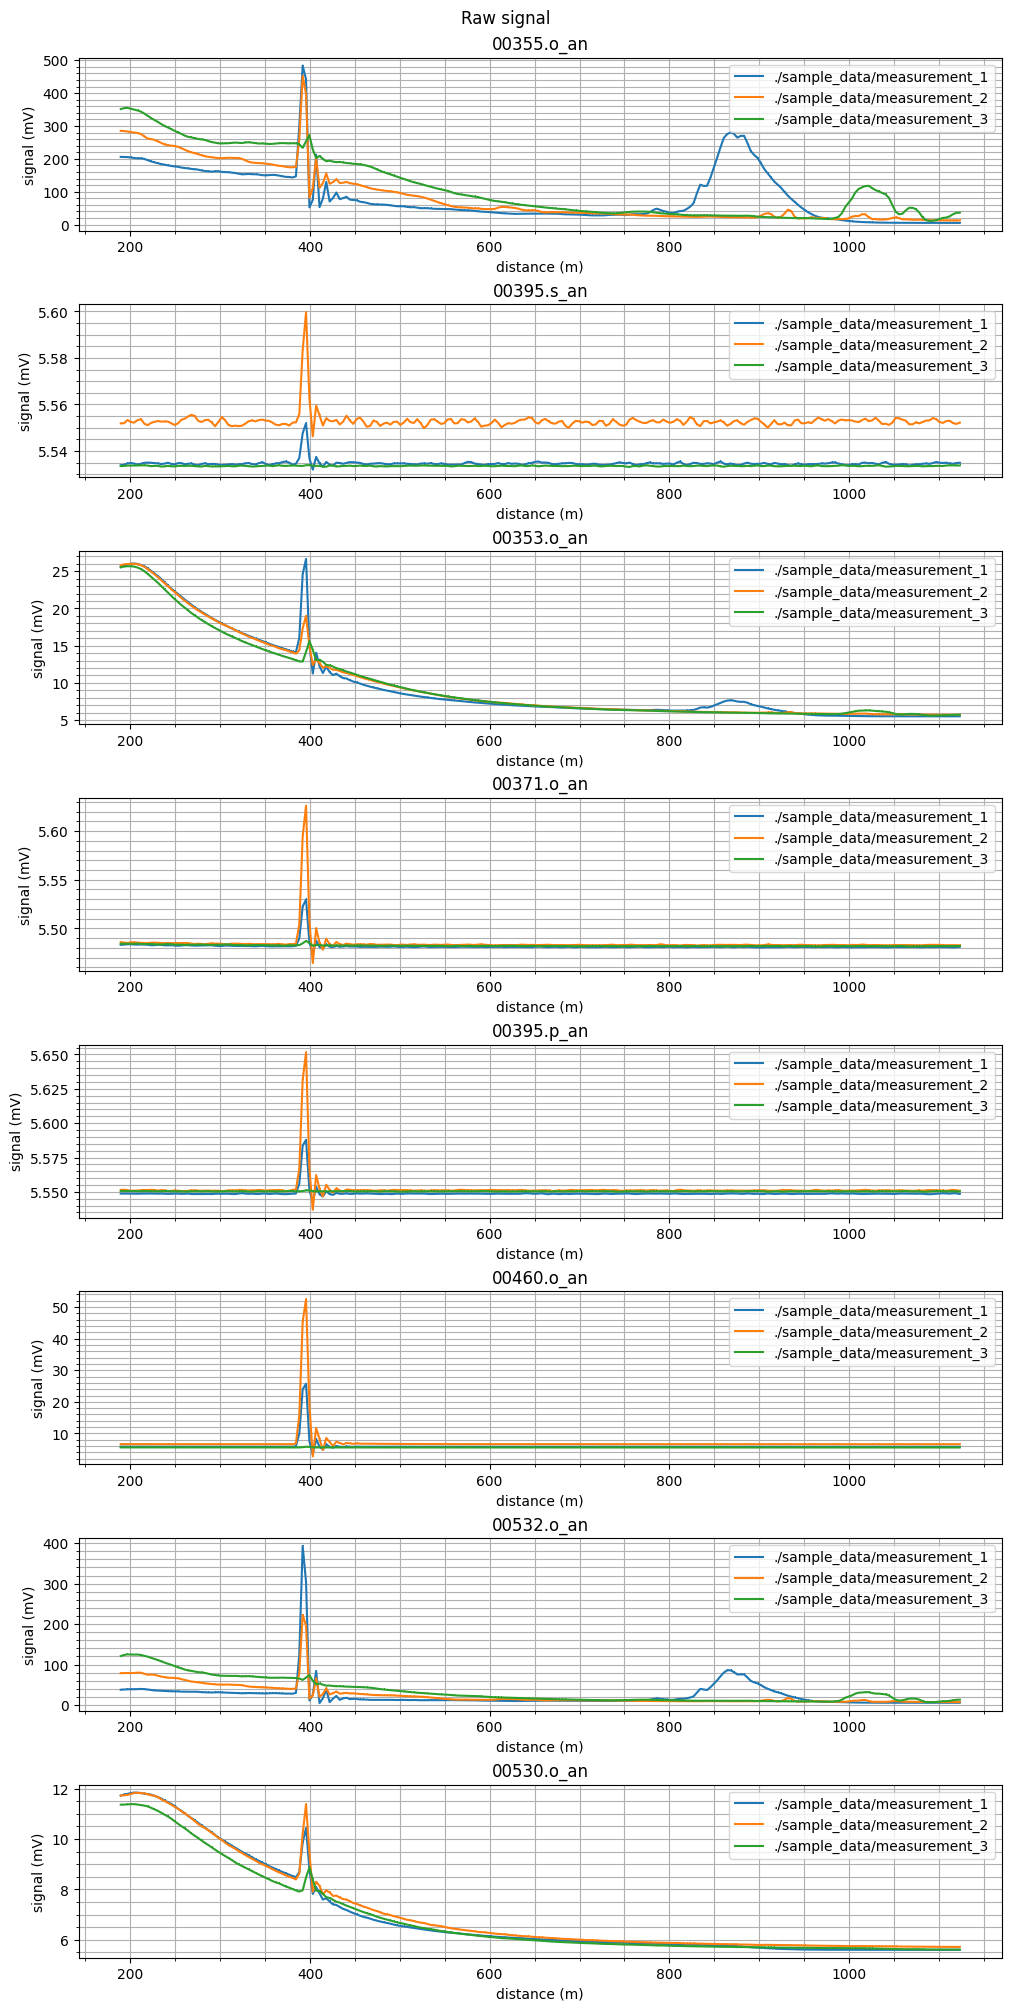

In [3]:
number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=number_traces, figsize=(10,20), layout='constrained')
fig.suptitle('Raw signal')
for name, data in measurements_average.items():
    for i,trace in enumerate(measurements_average[name]):
        ax[i].plot(trace[0], trace[1], label=name, marker=',')
        ax[i].set_title(licel_channels_names[i])
        ax[i].grid(True, 'both')
        ax[i].minorticks_on()
        ax[i].set_xlabel('distance (m)')
        ax[i].set_ylabel('signal (mV)')
        ax[i].legend()

## Save to a file

In [4]:
fig.savefig('raw_signals_lidar.png')